In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
auto_price = pd.read_csv('Automobile_price_data__Raw_.csv', sep = ',')
display(auto_price)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# Convert object columns to numerical columns
cols = ['bore','stroke','horsepower','peak-rpm','price']
# args = ('coerce') => these columns have coersion of multiple dtypes numeric + string
auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args = ('coerce',)) 

In [5]:
# Remove/Drop the Missing Value Rows
auto_price.dropna(inplace = True)

#### Line Plot
    * Relationship Plot (Bivariate)
    * Trends - Univariate

<AxesSubplot:>

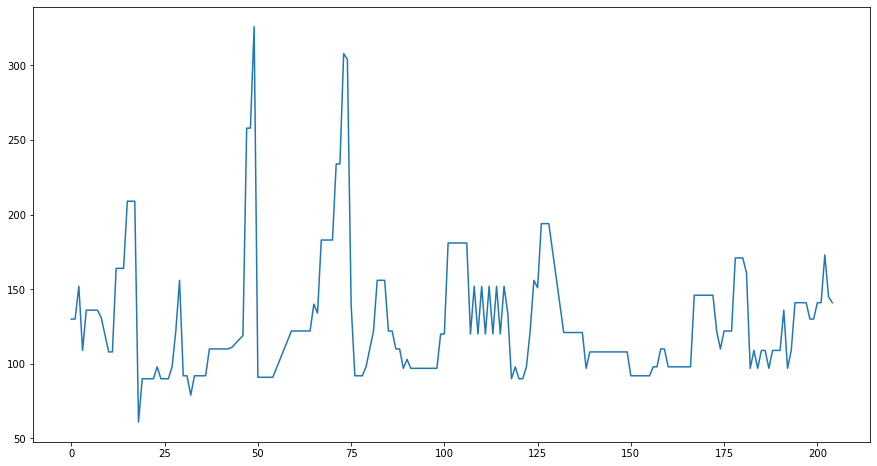

In [9]:
auto_price['engine-size'].plot(kind = 'line', figsize = (15,8))

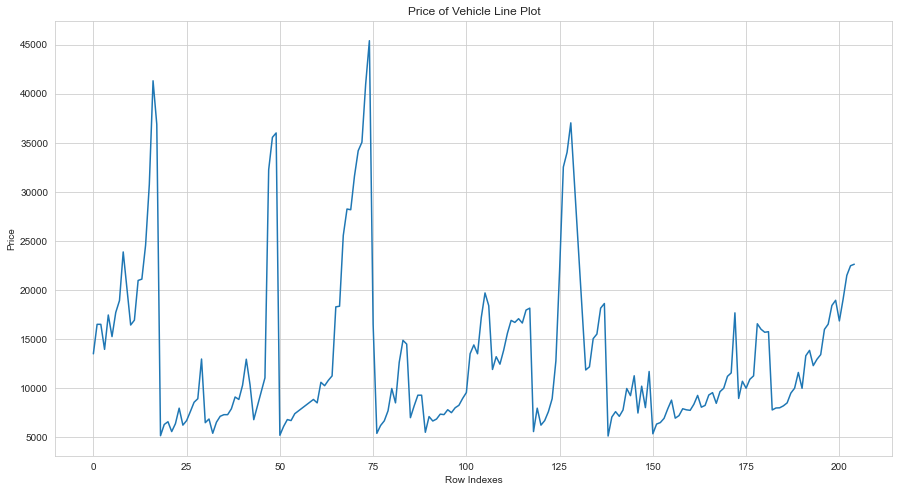

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.plot(auto_price['price'])
plt.title('Price of Vehicle Line Plot', size = 12)
plt.xlabel('Row Indexes')
plt.ylabel('Price')
plt.show()

#### Bar Plot
    * Bivariate Analysis
    * Bar chart used by Categorical, Nominal , Categorical vs. Numerical/Continious
    * Bar Plots are used to display counts (.value_counts()) of unique value of categorical dtype, Height of Bar represents count for each category.

<AxesSubplot:>

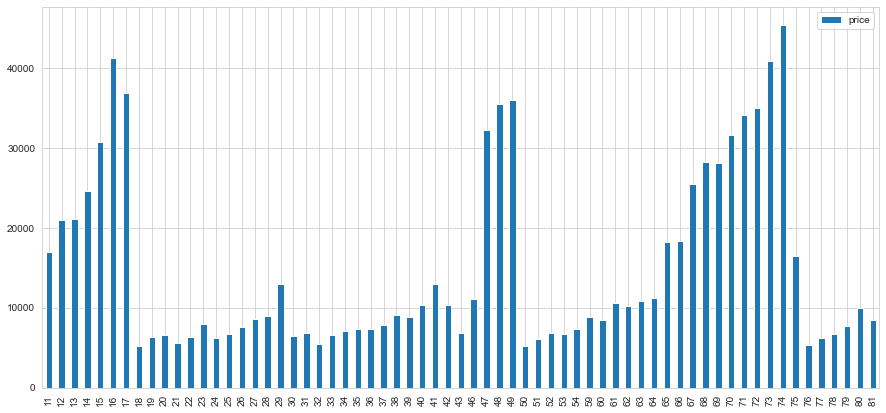

In [22]:
sns.set_style('whitegrid')
auto_price[['price']].iloc[10:75,].plot.bar(figsize = (15,7))

<AxesSubplot:>

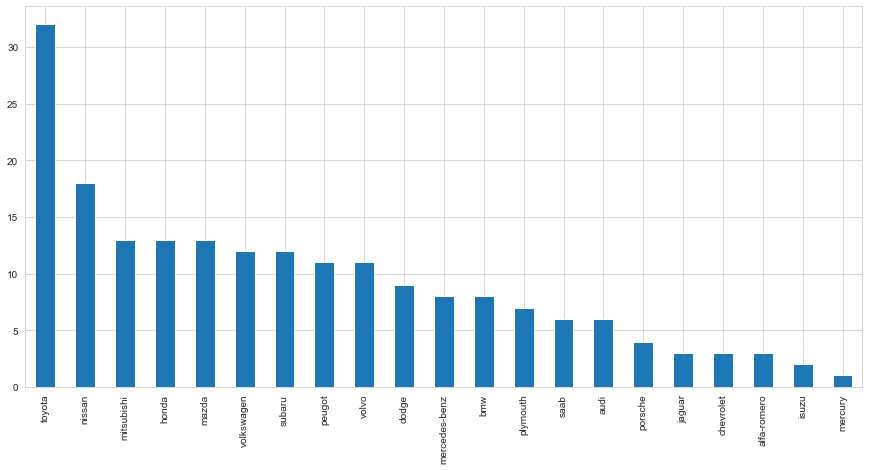

In [24]:
auto_price['make'].value_counts().plot.bar(figsize = (15,7))

#### Histogram 
    * Continious Samples - Study the spread / Distribution of Data.
    * Univariate Analysis

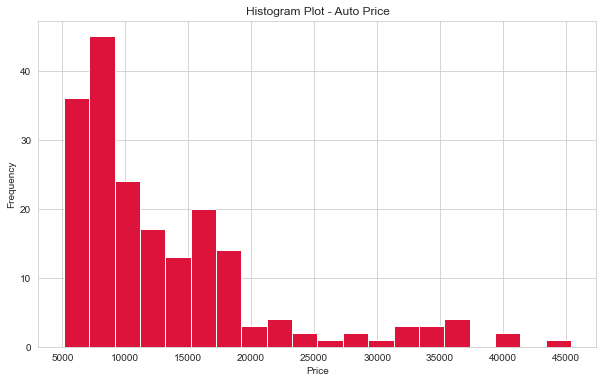

In [30]:
fig = plt.figure(figsize = (10,6))
# bins = intervals
# Positive Skewness
plt.hist(auto_price['price'], color = 'crimson', bins = 20)
plt.title('Histogram Plot - Auto Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distribution Plot
    * Histogram + Density
    * Probability Density Function (PDF) -> Continious

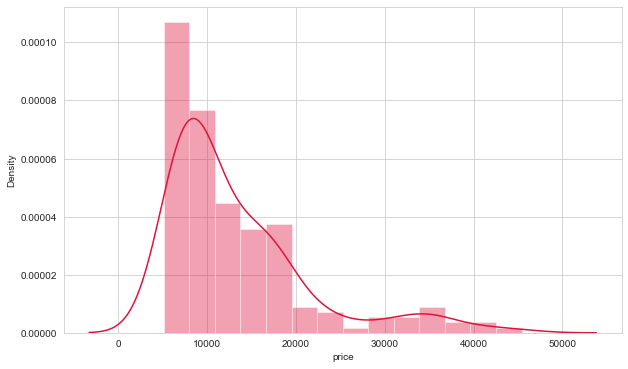

In [49]:
fig = plt.figure(figsize = (10,6))
sns.distplot(auto_price['price'], color = 'crimson')
plt.show()

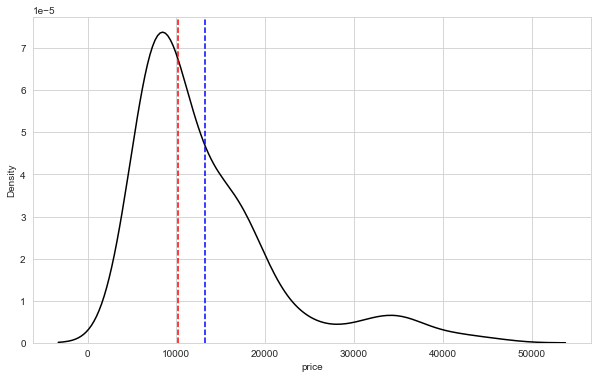

In [47]:
fig = plt.figure(figsize = (10,6))
sns.distplot(auto_price['price'], color = 'k', hist = False)
plt.axvline(auto_price['price'].mean(), linestyle = '--', color = 'b')
plt.axvline(auto_price['price'].median(), linestyle = '--', color = 'r')
plt.show()

#### Subplots

Text(0, 0.5, 'Number of Vehicle')

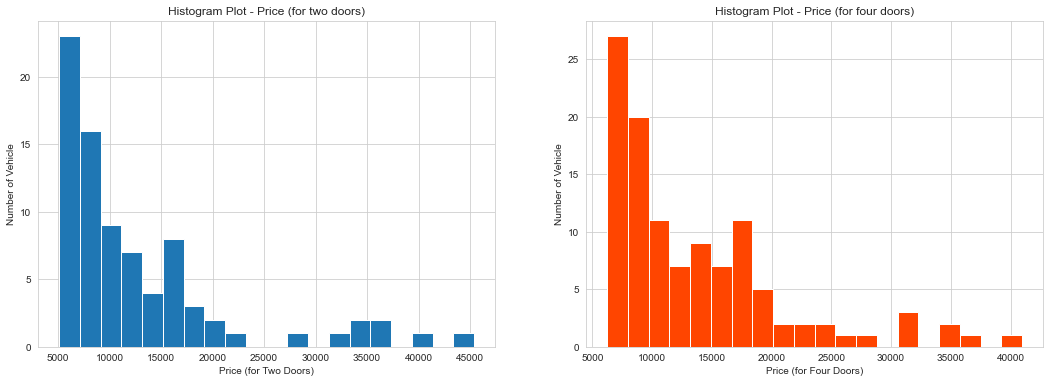

In [62]:
plt.figure(figsize = (18,6))
# (1,2,1) => 1st Row, 2nd Col, 1st Index 
plt.subplot(1, 2, 1)
plt.hist(auto_price[auto_price['num-of-doors'] == 'two']['price'], bins = 20)
plt.title('Histogram Plot - Price (for two doors)')
plt.xlabel('Price (for Two Doors)')
plt.ylabel('Number of Vehicle')

plt.subplot(1, 2, 2)
plt.hist(auto_price[auto_price['num-of-doors'] == 'four']['price'], color = 'orangered', bins = 20)
plt.title('Histogram Plot - Price (for four doors)')
plt.xlabel('Price (for Four Doors)')
plt.ylabel('Number of Vehicle')

#### Q-Q Plot
    * Test for Normality

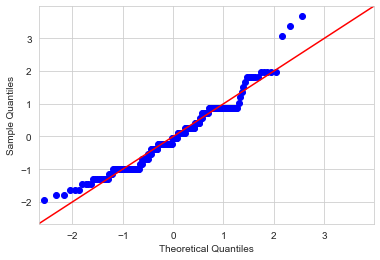

In [64]:
import statsmodels.api as stats
stats.qqplot(auto_price['city-mpg'], line = '45', fit = True)
plt.show()

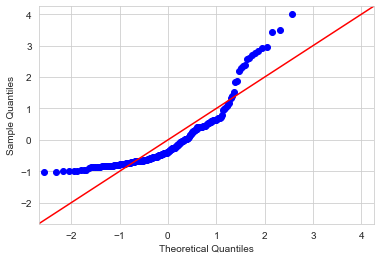

In [65]:
stats.qqplot(auto_price['price'], line = '45', fit = True)
plt.show()

#### Scatter Plot
    * Scatter Plot is plotted between numerical values. 
    * Shows relationship b/w x & y plots.
    * Bivariate

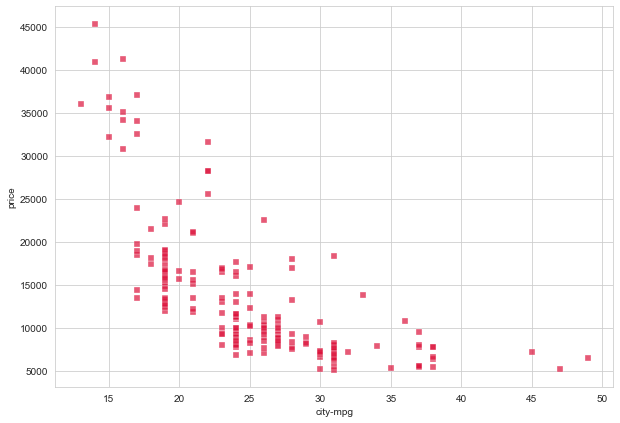

In [67]:
plt.figure(figsize=(10,7))
# alpha = transpenrancy
# marker = changing the scatter plots style o,x,X,s,d,>,<,*,.,^
sns.scatterplot(x = auto_price['city-mpg'], y = auto_price['price'], color = 'crimson', marker = 's', alpha = 0.7)
plt.show()

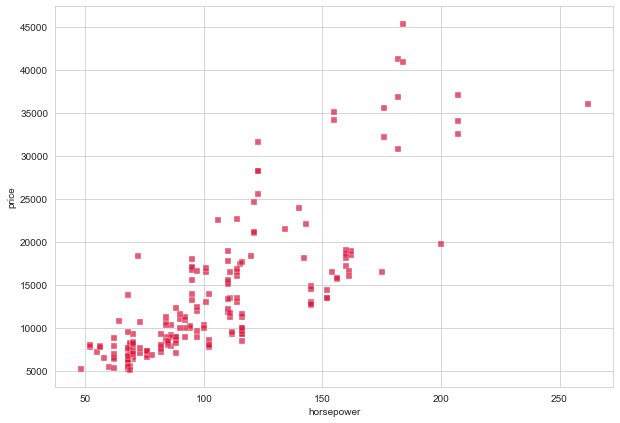

In [78]:
plt.figure(figsize=(10,7))
# alpha = transpenrancy
# marker = changing the scatter plots style o,x,X,s,d,>,<,*,.,^
sns.scatterplot(x = auto_price['horsepower'], y = auto_price['price'], color = 'crimson', marker = 's', alpha = 0.7)
plt.show()

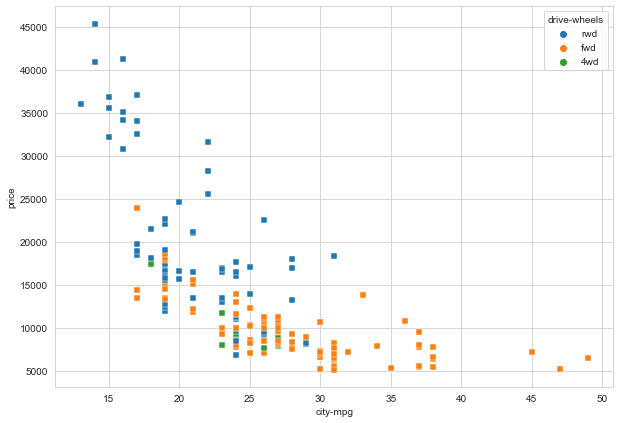

In [76]:
plt.figure(figsize=(10,7))
# alpha = transpenrancy
# marker = changing the scatter plots style o,x,X,s,d,>,<,*,.,^
sns.scatterplot(x = auto_price['city-mpg'], y = auto_price['price'], color = 'crimson', marker = 's',
               hue = auto_price['drive-wheels'])
plt.show()

#### Heatmap
    * Multivariate Data

In [79]:
auto_price.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.535565,-0.363063,-0.248580,-0.517540,-0.230350,-0.068284,-0.145823,-0.011971,-0.181258,0.072655,0.230597,0.011761,0.079514,-0.084118
wheel-base,-0.535565,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,-0.363063,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,-0.248580,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
height,-0.517540,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb-weight,-0.230350,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine-size,-0.068284,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,-0.145823,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,-0.011971,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746
compression-ratio,-0.181258,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500


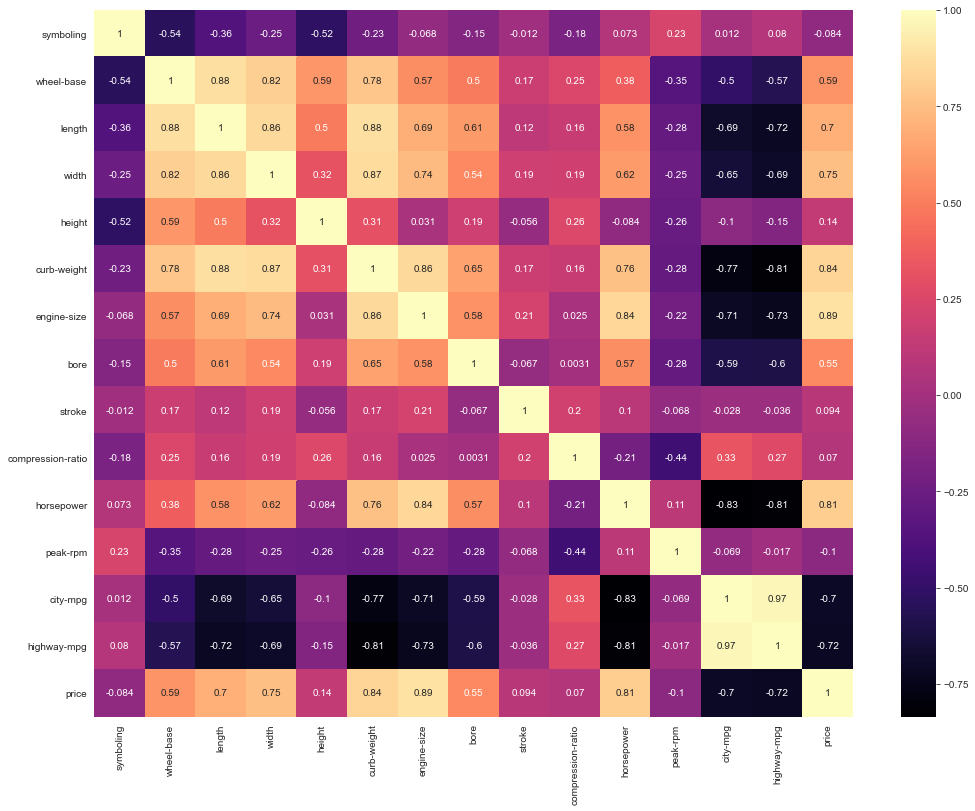

In [82]:
plt.figure(figsize=(17,13))
# annot = True
sns.heatmap(auto_price.corr(), annot=True, cmap='magma')
plt.show()

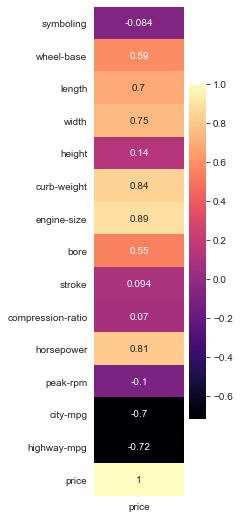

In [84]:
plt.figure(figsize=(2,9))
# annot = True, show correlation for selected column = price
sns.heatmap(auto_price.corr()[['price']], annot=True, cmap='magma')
plt.show()